In [125]:
import pandas as pd
import seaborn as sns
import random
import math
from sklearn import datasets, linear_model

In [126]:
df = pd.read_csv('SalariesSimple.csv')
print(df)

      total_experience_years  annual_base_pay
0                       13.0         125000.0
1                       15.0          65000.0
2                        4.0          86000.0
3                        4.0         105000.0
4                        4.0         110000.0
...                      ...              ...
1650                     1.0          60500.0
1651                     6.0         164000.0
1652                     7.0         150000.0
1653                     5.0          75000.0
1654                     2.0             50.0

[1655 rows x 2 columns]


In [127]:
df.dropna(axis=0, inplace=True)
df = df[(df['annual_base_pay'] >15000) & (df['total_experience_years']>0)]
df.drop(df[df['annual_base_pay']>= 300000].index, inplace=True)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1420 entries, 0 to 1653
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   total_experience_years  1420 non-null   float64
 1   annual_base_pay         1420 non-null   float64
dtypes: float64(2)
memory usage: 33.3 KB


In [129]:
df.describe()

,total_experience_years,annual_base_pay
count,1420.000000,1420.000000
mean,6.949880,100932.009873
std,5.353317,46193.158326
min,0.500000,16543.000000
25%,3.000000,65962.500000
50%,5.000000,100000.000000
75%,10.000000,130000.000000
max,43.000000,290000.000000


<Axes: xlabel='total_experience_years', ylabel='annual_base_pay'>

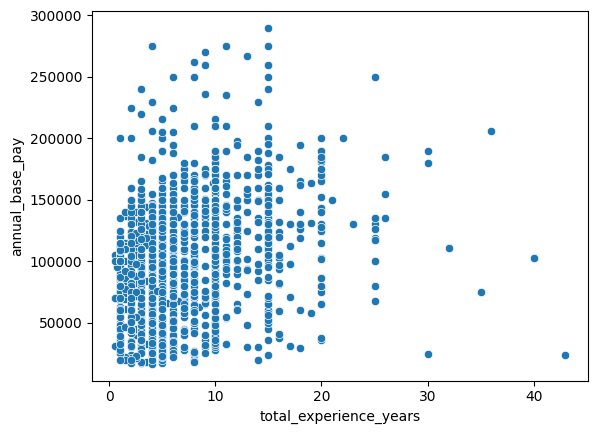

In [130]:
sns.scatterplot(data=df, x='total_experience_years', y="annual_base_pay")

In [131]:
df = df[(df['annual_base_pay'] >15000) & (df['total_experience_years']>0)]
print(df['annual_base_pay'].max())

290000.0


In [132]:
def testTrainSplit(data):
    length = len(df.index)
    splitLimit = int(length * 0.7)
    train = data[0: splitLimit]
    test = data[splitLimit + 1: length]
    return train, test

In [133]:
train, test = testTrainSplit(df)

In [134]:
def sumOfDistances(trainDF, model):
    sum = 0
    a = model[0]
    b = model[1]
    c = model[2]
    for row in range(0, len(trainDF.index)):
        exp = trainDF.iat[row, 0]
        pay = trainDF.iat[row, 1]
        distance = abs((a*exp) + (b*pay) + c) / math.sqrt((a*a) + (b*b))
        sum = sum + distance
    return sum

In [135]:
def take_random_step(model):
  return [
      model[0] + (random.randint(0,500)),
      model[1] + 0,# Subtract off 0.5 to generate negative and positive steps
      model[2] + (random.randint(100,500)),
  ]

def take_best_step(trainDF, model):
  old_distance = sumOfDistances(trainDF, model)
  for i in range(100): # try 50 times; if we fail to improve, return the old model
    new_model = take_random_step(model)
    new_distance = sumOfDistances(trainDF, new_model)
    if new_distance < old_distance:
      return new_model
  return model # by default, return the old model

In [136]:
def trainLinearRegression(trainDF, iterations):
    modelA = [1,-1,900]
    sumA = sumOfDistances(train, modelA)
    modelB = modelA[:]

    for i in range(iterations):
        modelB = take_best_step(trainDF, modelB)
  
    # Calculate distance of best model found
    distanceB = sumOfDistances(trainDF, modelB)
    print("Final model - weights: ", modelB, " distance: ", distanceB)


In [137]:
trainSlopes = trainLinearRegression(train, 200)
print(trainSlopes)

Final model - weights:  [15619, -1, 18057]  distance:  3687.5781946316765
None


In [138]:
temp = min(trainSlopes.values())
res = [key for key in trainSlopes if trainSlopes[key] == temp]
 
print("slope: " + str(res[0]))
print("distace: " + str(temp))

AttributeError: 'NoneType' object has no attribute 'values'